In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from neurobiases.utils import process_tc_results

%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'], 'fits/neurobiases')

In [3]:
coupling_path = os.path.join(base_path, "bias_analysis_coupling.npz")
tuning_path = os.path.join(base_path, "bias_analysis_tuning.npz")
nc_path = os.path.join(base_path, "bias_analysis_nc.npz")

In [4]:
coupling_results = np.load(coupling_path)
tuning_results = np.load(tuning_path)
nc_results = np.load(nc_path)

# Coupling Experiment

In [5]:
a_trues, b_trues, a_bias, b_bias, a_bias_norm, b_bias_norm = process_tc_results(coupling_results)

In [6]:
a_bias_avg = np.median(np.mean(a_bias, axis=2), axis=2)
b_bias_avg = np.median(np.mean(b_bias, axis=2), axis=2)

In [7]:
a_sums = np.sum(a_trues, axis=-1)
a_norms = np.linalg.norm(a_trues, ord=2, axis=-1)
means = np.linspace(-3, 3, 30)

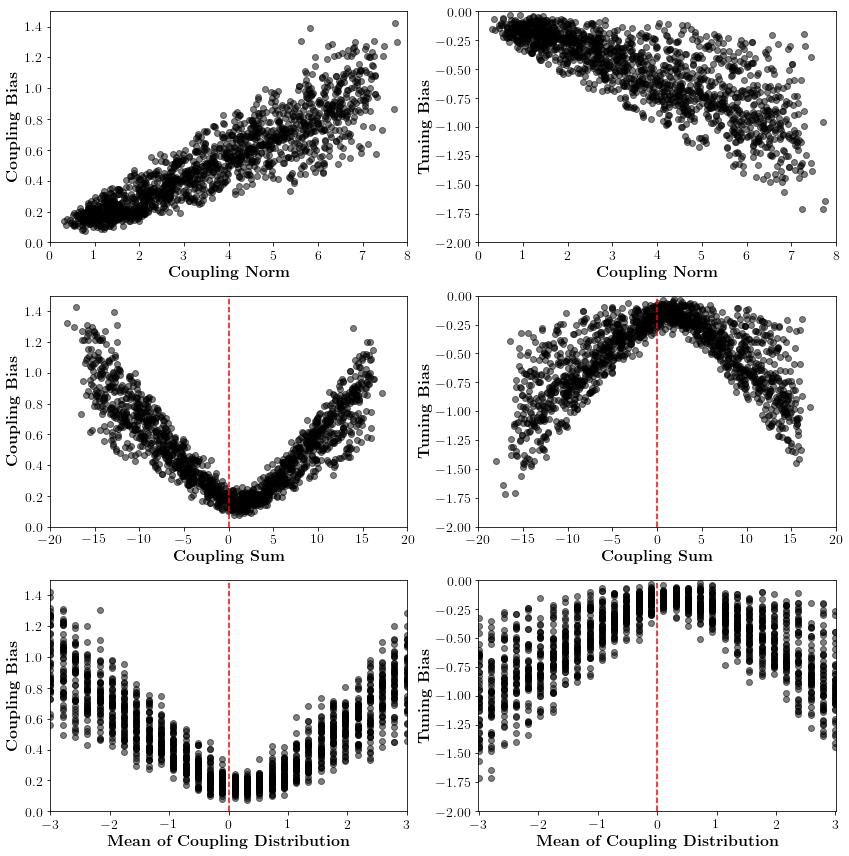

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Coupling norms
axes[0, 0].scatter(
    a_norms.ravel(),
    a_bias_avg.ravel(),
    alpha=0.5,
    color='black')
axes[0, 1].scatter(
    a_norms.ravel(),
    b_bias_avg.ravel(),
    alpha=0.5,
    color='black')
# Coupling sums
axes[1, 0].scatter(
    a_sums.ravel(),
    a_bias_avg.ravel(),
    alpha=0.5,
    color='black')
axes[1, 1].scatter(
    a_sums.ravel(),
    b_bias_avg.ravel(),
    alpha=0.5,
    color='black')
# Means
axes[2, 0].scatter(
    np.repeat(means, 50),
    a_bias_avg.ravel(),
    alpha=0.5,
    color='black')
axes[2, 1].scatter(
    np.repeat(means, 50),
    b_bias_avg.ravel(),
    alpha=0.5,
    color='black')

for ax in axes[0]:
    ax.set_xlim([0, 8])
    ax.set_xlabel(r'\textbf{Coupling Norm}', fontsize=16)
    
axes[0, 0].set_ylim([0, 1.5])
axes[0, 0].set_ylabel(r'\textbf{Coupling Bias}', fontsize=16)
axes[0, 1].set_ylim([-2, 0])
axes[0, 1].set_ylabel(r'\textbf{Tuning Bias}', fontsize=16)

for ax in axes[1]:
    ax.axvline(0, color='red', linestyle='--')
    ax.set_xlim([-20, 20])
    ax.set_xlabel(r'\textbf{Coupling Sum}', fontsize=16)
    ax.set_ylabel(r'\textbf{Coupling Bias}', fontsize=16)
    
axes[1, 0].set_ylim([0, 1.5])
axes[0, 0].set_ylabel(r'\textbf{Coupling Bias}', fontsize=16)
axes[1, 1].set_ylim([-2, 0])
axes[1, 1].set_ylabel(r'\textbf{Tuning Bias}', fontsize=16)

for ax in axes[2]:
    ax.axvline(0, color='red', linestyle='--')
    ax.set_xlim([-3.01, 3.01])
    ax.set_xlabel(r'\textbf{Mean of Coupling Distribution}', fontsize=16)
    
axes[2, 0].set_ylim([0, 1.5])
axes[2, 0].set_ylabel(r'\textbf{Coupling Bias}', fontsize=16)
axes[2, 1].set_ylim([-2, 0])
axes[2, 1].set_ylabel(r'\textbf{Tuning Bias}', fontsize=16)

for ax in axes.ravel():
    ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('tc_experiment_coupling.pdf', bbox_inches='tight')

# Tuning Distributions

In [9]:
a_trues, b_trues, a_bias, b_bias, a_bias_norm, b_bias_norm = process_tc_results(tuning_results)

In [10]:
a_bias_avg = np.median(np.mean(a_bias, axis=2), axis=2)
b_bias_avg = np.median(np.mean(b_bias, axis=2), axis=2)

In [11]:
b_sums = np.sum(b_trues, axis=-1)
b_norms = np.linalg.norm(b_trues, ord=2, axis=-1)
means = np.linspace(-3, 3, 30)

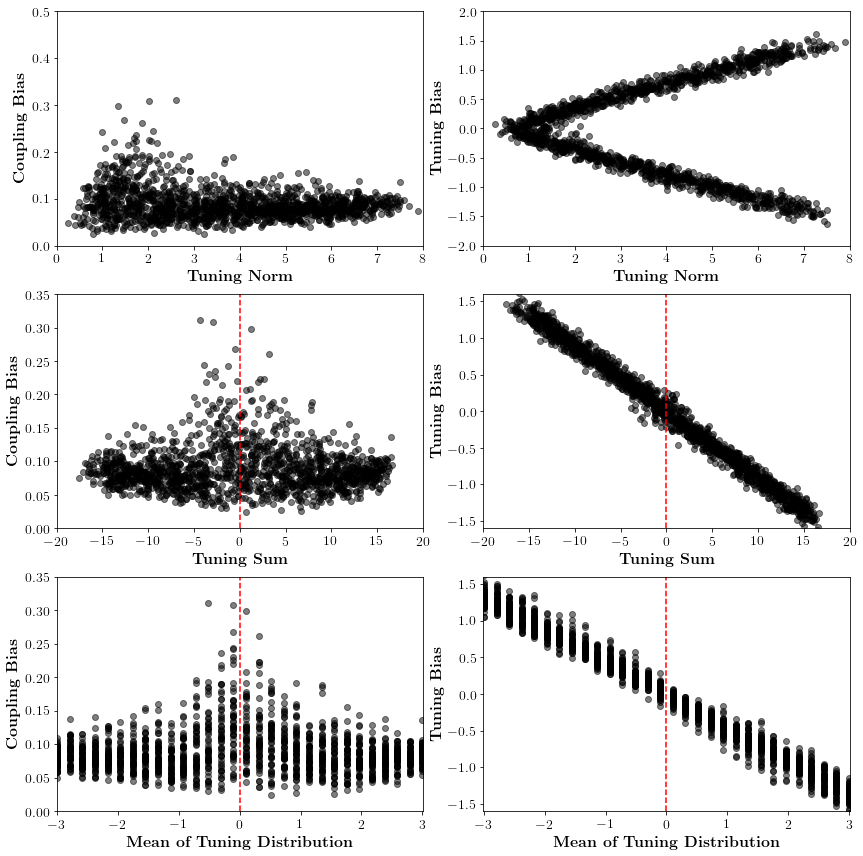

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Tuning norms
axes[0, 0].scatter(
    b_norms.ravel(),
    a_bias_avg.ravel(),
    alpha=0.5,
    color='black')
axes[0, 1].scatter(
    b_norms.ravel(),
    b_bias_avg.ravel(),
    alpha=0.5,
    color='black')
# Tuning sums
axes[1, 0].scatter(
    b_sums.ravel(),
    a_bias_avg.ravel(),
    alpha=0.5,
    color='black')
axes[1, 1].scatter(
    b_sums.ravel(),
    b_bias_avg.ravel(),
    alpha=0.5,
    color='black')
# Means
axes[2, 0].scatter(
    np.repeat(means, 50),
    a_bias_avg.ravel(),
    alpha=0.5,
    color='black')
axes[2, 1].scatter(
    np.repeat(means, 50),
    b_bias_avg.ravel(),
    alpha=0.5,
    color='black')

for ax in axes[0]:
    ax.set_xlim([0, 8])
    ax.set_xlabel(r'\textbf{Tuning Norm}', fontsize=16)
    
axes[0, 0].set_ylim([0, 0.5])
axes[0, 0].set_ylabel(r'\textbf{Coupling Bias}', fontsize=16)
axes[0, 1].set_ylim([-2, 2])
axes[0, 1].set_ylabel(r'\textbf{Tuning Bias}', fontsize=16)

for ax in axes[1]:
    ax.axvline(0, color='red', linestyle='--')
    ax.set_xlim([-20, 20])
    ax.set_xlabel(r'\textbf{Tuning Sum}', fontsize=16)
    ax.set_ylabel(r'\textbf{Coupling Bias}', fontsize=16)
    
axes[1, 0].set_ylim([0, 0.35])
axes[0, 0].set_ylabel(r'\textbf{Coupling Bias}', fontsize=16)
axes[1, 1].set_ylim([-1.6, 1.6])
axes[1, 1].set_ylabel(r'\textbf{Tuning Bias}', fontsize=16)

for ax in axes[2]:
    ax.axvline(0, color='red', linestyle='--')
    ax.set_xlim([-3.01, 3.01])
    ax.set_xlabel(r'\textbf{Mean of Tuning Distribution}', fontsize=16)
    
axes[2, 0].set_ylim([0, 0.35])
axes[2, 0].set_ylabel(r'\textbf{Coupling Bias}', fontsize=16)
axes[2, 1].set_ylim([-1.6, 1.6])
axes[2, 1].set_ylabel(r'\textbf{Tuning Bias}', fontsize=16)

for ax in axes.ravel():
    ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('tc_experiment_tuning.pdf', bbox_inches='tight')

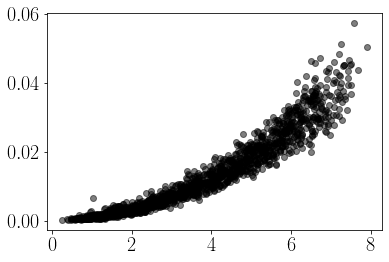

In [33]:
plt.scatter(
    b_norms.ravel(),
    np.median(np.var(b_bias, axis=2), axis=2).ravel(),
    alpha=0.5,
    color='black')

# Noise Correlation

In [34]:
# Get true and estimated parameters
a_trues = nc_results['a_trues']
b_trues = nc_results['b_trues']
a_hats = nc_results['a_hats']
b_hats = nc_results['b_hats']

# Get number of non-zero parameters
n_nz_a = np.unique(np.count_nonzero(a_trues, axis=-1)).item()
n_nz_b = np.unique(np.count_nonzero(b_trues, axis=-1)).item()
n_models, n_hyparams, n_datasets = a_hats.shape[:-1]

# Calculate biases
a_bias = np.zeros((n_models, n_hyparams, n_datasets, n_nz_a))
b_bias = np.zeros((n_models, n_hyparams, n_datasets, n_nz_b))

for model_idx in range(n_models):
    current_a = a_trues[model_idx]
    current_b = b_trues[model_idx]
    a_true_nz = current_a[current_a != 0]
    b_true_nz = current_b[current_b != 0]
    for hyp_idx in range(n_hyparams):
        for dataset_idx in range(n_datasets):
            # Calculate biases per model and hyperparameters
            a_bias_temp = a_hats[model_idx, hyp_idx, dataset_idx][current_a != 0] - a_true_nz
            b_bias_temp = b_hats[model_idx, hyp_idx, dataset_idx][current_b != 0] - b_true_nz
            a_bias[model_idx, hyp_idx, dataset_idx] = a_bias_temp
            b_bias[model_idx, hyp_idx, dataset_idx] = b_bias_temp

In [35]:
corrs = np.linspace(0., 1, 15, endpoint=False)

In [36]:
a_bias_avg = np.median(np.mean(a_bias, axis=2), axis=2)
b_bias_avg = np.median(np.mean(b_bias, axis=2), axis=2)

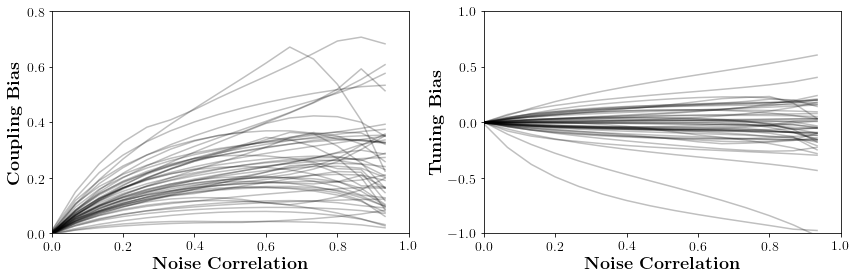

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for model in range(50):
    axes[0].plot(
        corrs,
        a_bias_avg[model],
        alpha=0.25,
        color='black')
    axes[1].plot(
        corrs,
        b_bias_avg[model],
        alpha=0.25,
        color='black')
    
for ax in axes:
    ax.set_xlabel(r'\textbf{Noise Correlation}', fontsize=18)
    ax.set_xlim([0, 1])
    ax.tick_params(labelsize=14)

axes[0].set_ylabel(r'\textbf{Coupling Bias}', fontsize=18)
axes[0].set_ylim([0, 0.8])
axes[1].set_ylabel(r'\textbf{Tuning Bias}', fontsize=18)
axes[1].set_ylim([-1, 1])

plt.tight_layout()
plt.savefig('tc_experiment_nc.pdf', bbox_inches='tight')

In [49]:
a_sums = np.sum(a_trues, axis=1)
b_sums = np.sum(b_trues, axis=1)

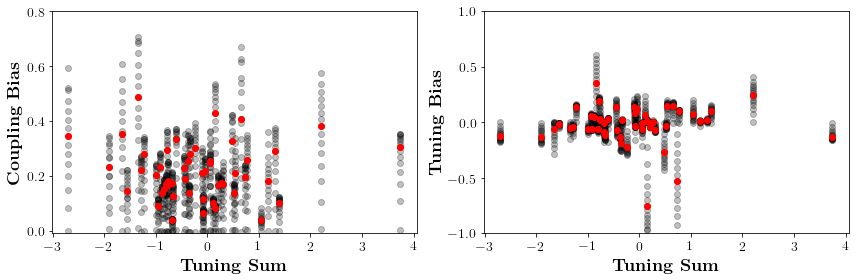

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for model in range(15):
    axes[0].scatter(
        b_sums, a_bias_avg[:, model],
        alpha=0.25,
        color='black')
    axes[1].scatter(
        b_sums, b_bias_avg[:, model],
        alpha=0.25,
        color='black')
    
axes[0].scatter(
    b_sums, np.median(a_bias_avg, axis=1),
    alpha=1,
    color='red')
axes[1].scatter(
    b_sums, np.median(b_bias_avg, axis=1),
    alpha=1,
    color='red')
for ax in axes:
    ax.set_xlabel(r'\textbf{Tuning Sum}', fontsize=18)
    ax.tick_params(labelsize=14)

axes[0].set_ylabel(r'\textbf{Coupling Bias}', fontsize=18)
axes[0].set_ylim([-0.01, 0.8])
axes[1].set_ylabel(r'\textbf{Tuning Bias}', fontsize=18)
axes[1].set_ylim([-1, 1])

plt.tight_layout()
plt.savefig('tc_experiment_nc2.pdf', bbox_inches='tight')